**Question 2: Which WHO regions have the highest total cumulative cases?**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cases_df = pd.read_csv('../../dataset/WHO-COVID-19-global-table-data.csv',index_col=False)

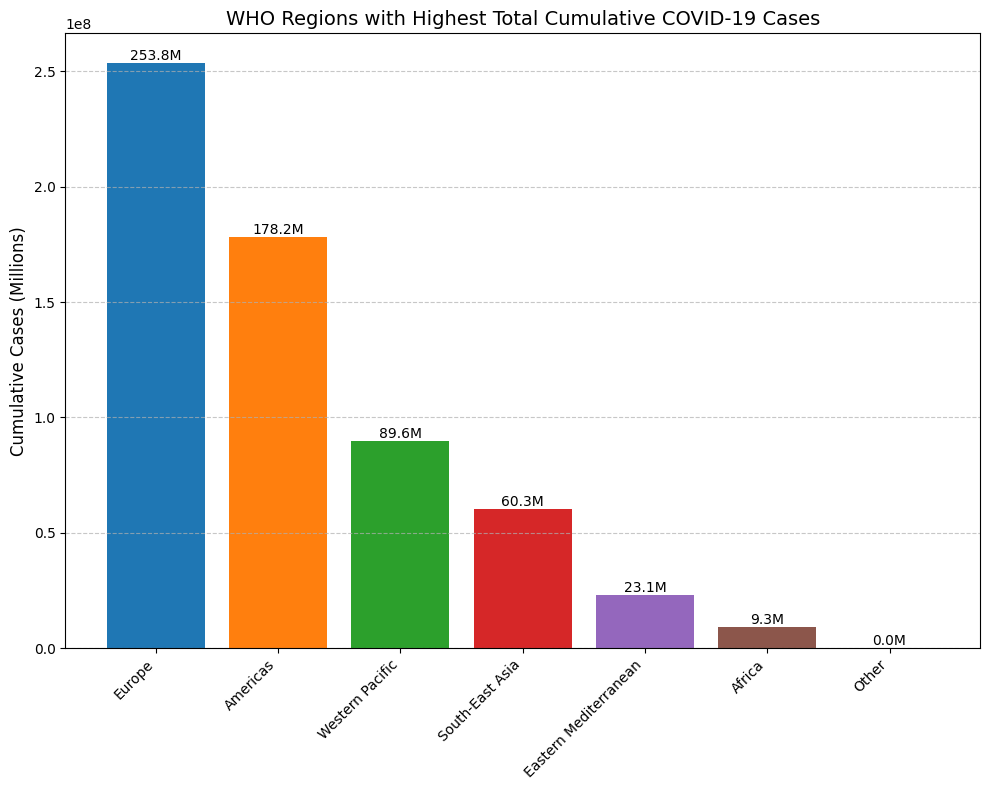

In [4]:
# Aggregate the total cumulative COVID-19 cases by WHO region.
region_cases = (
    cases_df.dropna(subset=['Cases - cumulative total'])  # Remove missing data
    .groupby('WHO Region')['Cases - cumulative total'].sum()  # Aggregate by WHO region
    .sort_values(ascending=False)  # Sort regions by total cases
    .reset_index()  # Reset index for plotting
)

# Define a set of distinct colors for the bars.
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Initialize the figure with specified dimensions.
plt.figure(figsize=(10, 8))

# Create a vertical bar chart for cumulative cases per WHO region.
bars = plt.bar(
    region_cases['WHO Region'],  # Regions on the x-axis
    region_cases['Cases - cumulative total'],  # Total cumulative cases on the y-axis
    color=colors[:len(region_cases)]  # Apply distinct colors to each bar
)

# Set axis labels and chart title.
plt.ylabel('Cumulative Cases (Millions)', fontsize=12)
plt.title('WHO Regions with Highest Total Cumulative COVID-19 Cases', fontsize=14)

# Rotate x-axis labels for better readability.
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add horizontal grid lines to improve readability of values.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying each bar with its value in millions, formatted to one decimal place.
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position text at the center of the bar
        bar.get_height(),  # Position text at the top of the bar
        f'{bar.get_height() / 1e6:.1f}M',  # Format value in millions
        ha='center', va='bottom', fontsize=10  # Align text horizontally and vertically
    )

# Display the plot
plt.tight_layout()
plt.savefig('WHO Regions with Highest Total Cumulative COVID-19 Cases.png')
plt.show()
plt.close()

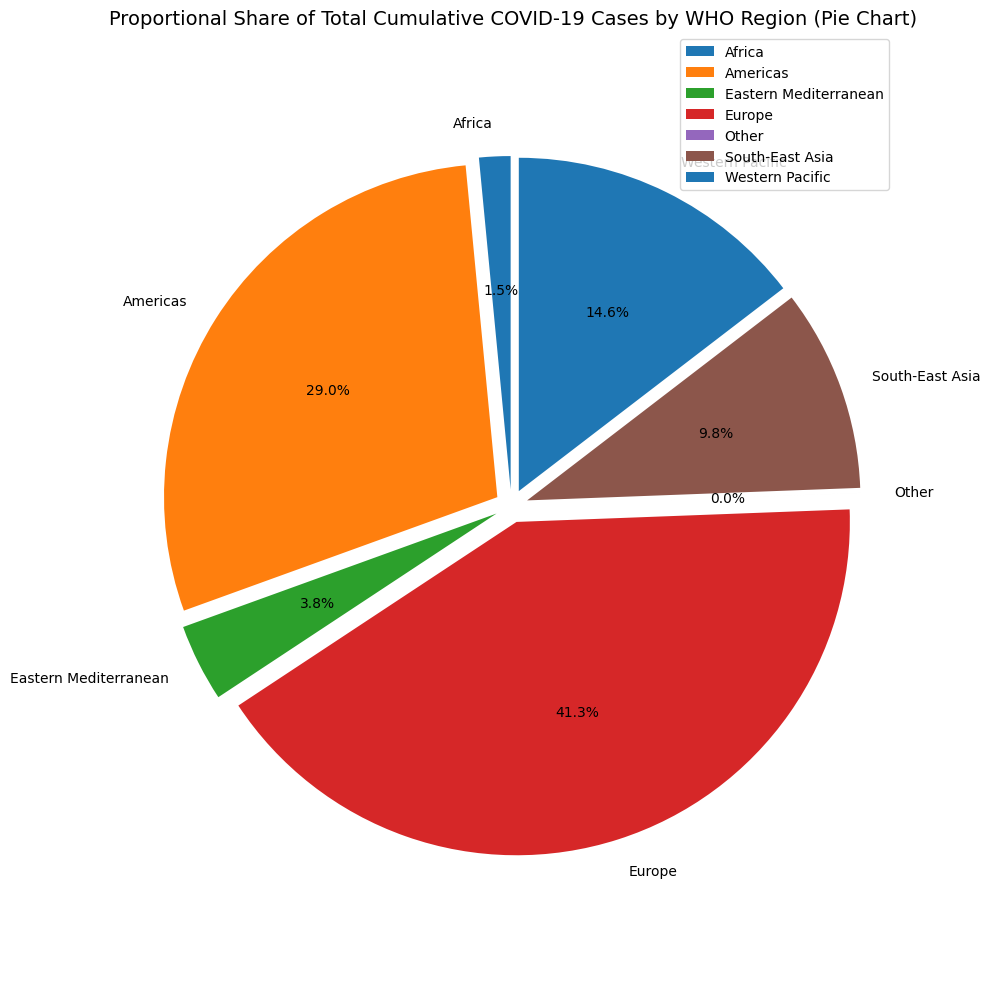

In [6]:
import matplotlib.pyplot as plt

region_cases = cases_df.dropna(subset=['Cases - cumulative total']).groupby('WHO Region')['Cases - cumulative total'].sum().reset_index()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10, 10))
plt.pie(
    region_cases['Cases - cumulative total'],
    labels=region_cases['WHO Region'],
    autopct='%1.1f%%',
    colors=colors,
    explode=[0.05]*len(region_cases),
    shadow=False,  # <-- Removed shadow
    startangle=90
)
plt.title('Proportional Share of Total Cumulative COVID-19 Cases by WHO Region (Pie Chart)', fontsize=14)
plt.legend(region_cases['WHO Region'], loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.savefig('alt_plot2.png')
plt.show()
plt.close()
